# Machine Learning Applications in Banking

### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

### Importing csv Data set

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.shape

(32581, 12)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(32416, 12)

In [ ]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [ ]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32416.000000,3.241600e+04,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000,32416.000000
mean,27.747008,6.609164e+04,4.768880,9593.845632,11.014662,0.218688,0.170250,5.811297
std,6.354100,6.201558e+04,4.090411,6322.730241,3.083050,0.413363,0.106812,4.059030
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.854200e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.921800e+04,7.000000,12250.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Non_Visual Analysis

### Categorical

In [ ]:
import pandas as pd

home_ownership_counts = df['person_home_ownership'].value_counts()

print(home_ownership_counts)

person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64


In [ ]:
import pandas as pd

loan_intent_counts = df['loan_intent'].value_counts()

print(loan_intent_counts)

loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64


In [ ]:
import pandas as pd

loan_grade_counts = df['loan_grade'].value_counts()

print(loan_grade_counts)

loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64


In [ ]:
import pandas as pd

loan_status_counts = df['loan_status'].value_counts()

print(loan_status_counts)

loan_status
0    25327
1     7089
Name: count, dtype: int64


In [ ]:
import pandas as pd
cb_person_default_on_file_counts = df['cb_person_default_on_file'].value_counts()

print(cb_person_default_on_file_counts)

cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64


In [ ]:
import pandas as pd

# Calculate additional statistics
income_range = df['person_income'].max() - df['person_income'].min()
income_iqr = df['person_income'].quantile(0.75) - df['person_income'].quantile(0.25)
income_skewness = df['person_income'].skew()
income_kurtosis = df['person_income'].kurtosis()


print("\nRange of Income:", income_range)
print("Interquartile Range (IQR) of Income:", income_iqr)
print("Skewness of Income Distribution:", income_skewness)
print("Kurtosis of Income Distribution:", income_kurtosis)



Range of Income: 5996000
Interquartile Range (IQR) of Income: 40676.0
Skewness of Income Distribution: 32.95874828815014
Kurtosis of Income Distribution: 2701.116240655086


### Data Visualization

In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

#### Continuous Numerical Variables:
1. person_age : Age of the person
2. person_income : Annual income of the person
3. person_emp_length : Employment length (in years)
4. loan_amnt : Loan amount
5. loan_int_rate : Interest rate
6. loan_percent_income : Percent income
7. cb_person_cred_hist_length': Credit history length
#### Discrete Categorcial Variables:
1. person_home_ownership: Home ownership status
2. loan_intent : Purpose of the loan
3. loan_grade : Grade of the loan
4. loan_status : Loan status (0 is non-default, 1 is default) - `Numerical <-> Categorical`
5. cb_person_default_on_file : Historical default on file

## Univariate analysis

#### 1) Categorical Columns

In [ ]:
categorical_columns = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
print("Categorical Columns:",categorical_columns)

Categorical Columns: ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


##### (i) Count Plot

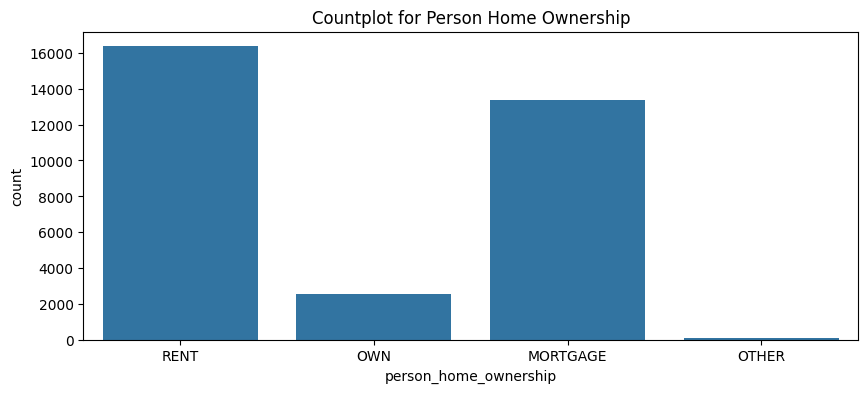

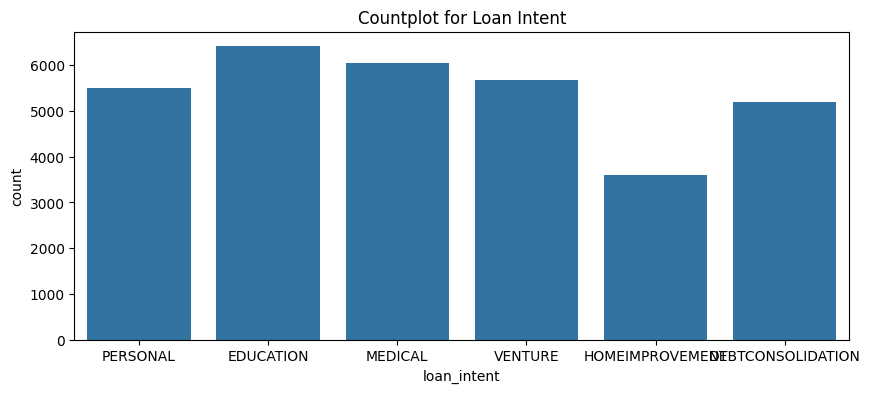

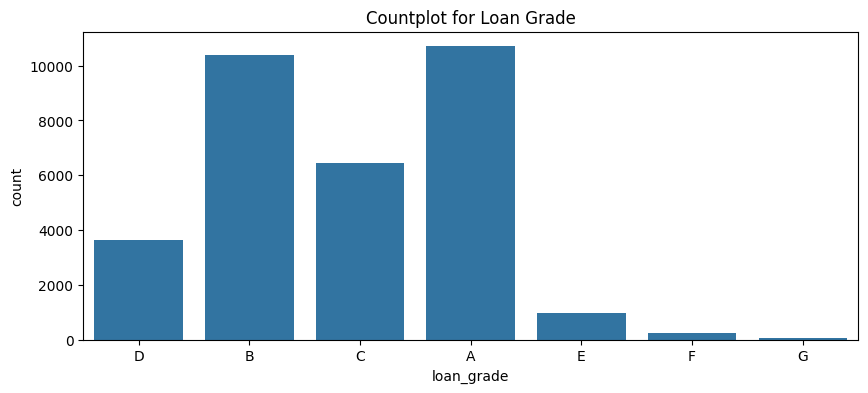

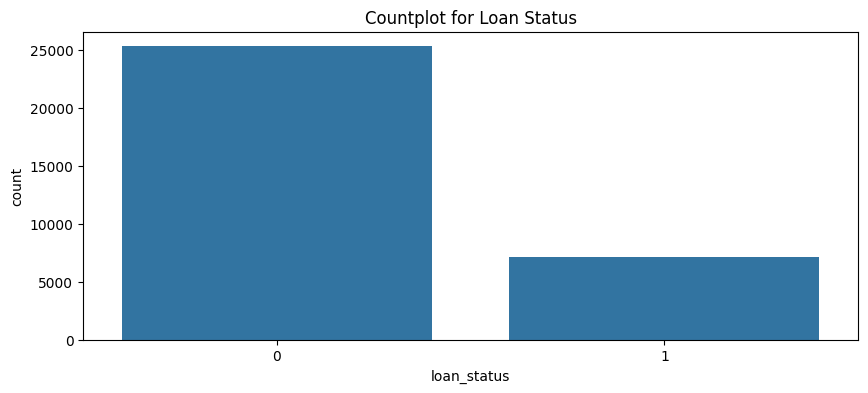

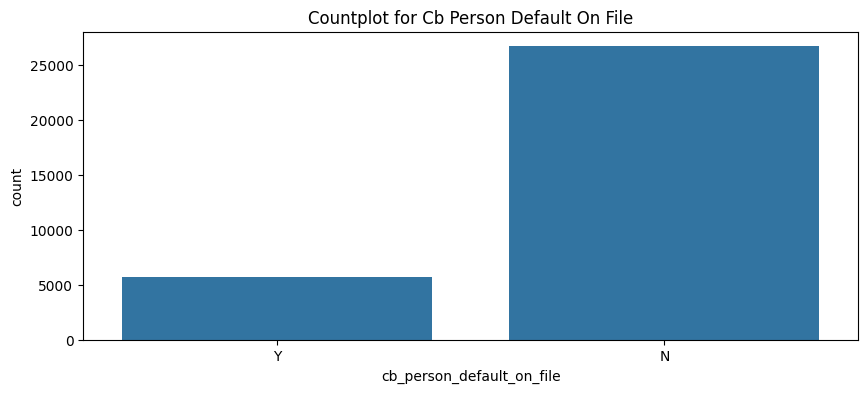

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


categorical_vars = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'loan_status', 'cb_person_default_on_file'
]

for var in categorical_vars:
    plt.figure(figsize=(10,4))
    sns.countplot(x=var, data=df)
    plt.title(f'Countplot for {var.replace("_", " ").title()}')
    plt.show()

In [ ]:
# prompt: what is laon grade

# Get the loan grade counts
loan_grade_counts = df['loan_grade'].value_counts()

# Print the loan grade counts
print(loan_grade_counts)


loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64


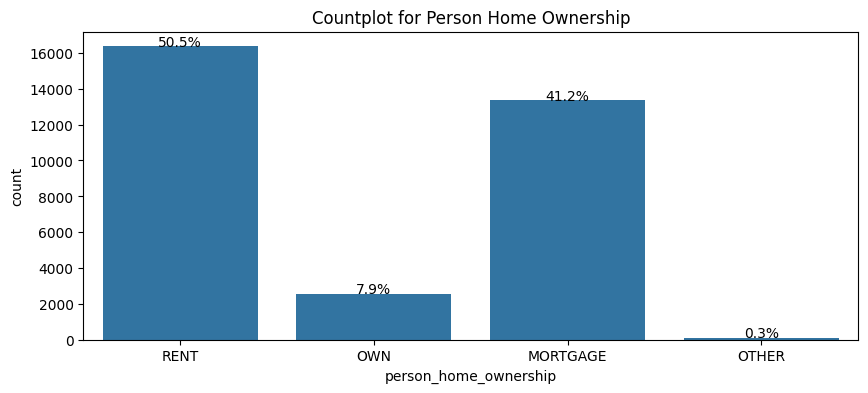

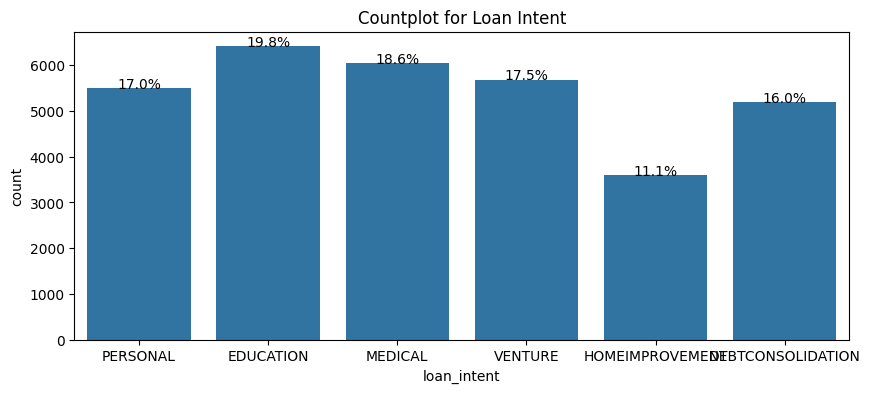

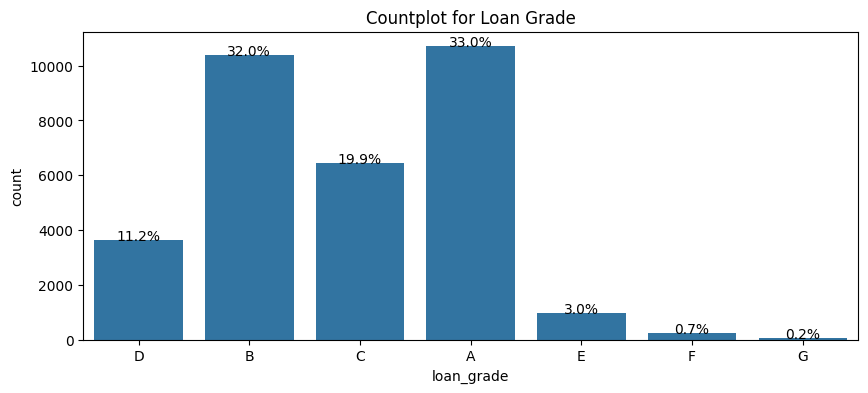

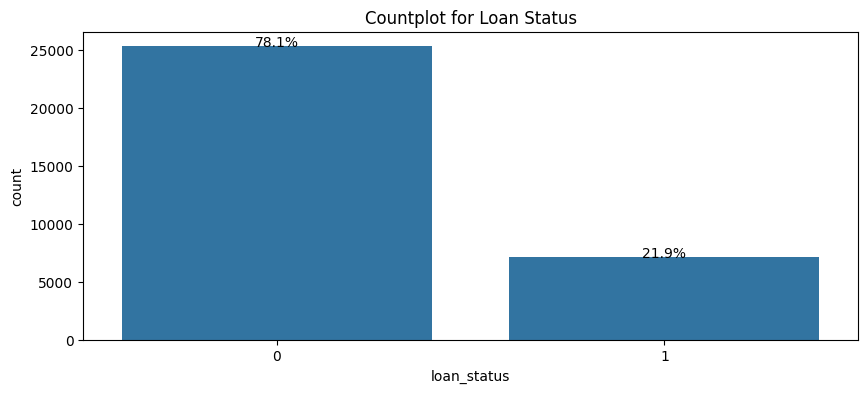

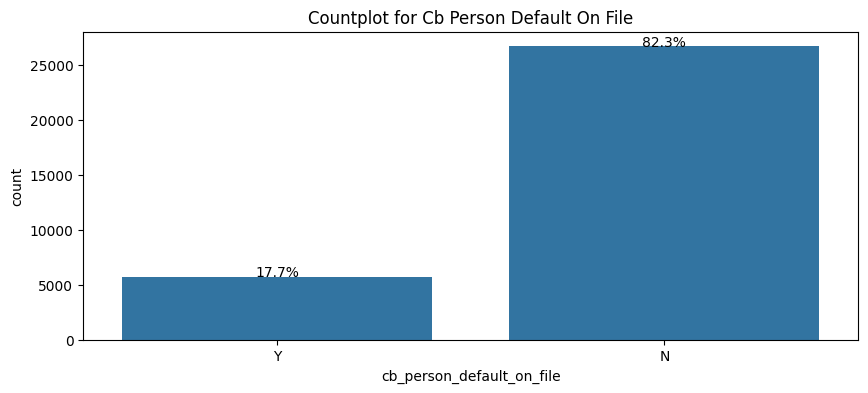

In [ ]:
# prompt: how to print percentage in count plots

for var in categorical_vars:
    plt.figure(figsize=(10,4))
    sns.countplot(x=var, data=df)
    plt.title(f'Countplot for {var.replace("_", " ").title()}')

    # Calculate percentages
    total = len(df)
    for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax = plt.gca()
        ax.text(x, y, percentage, ha='center')

    plt.show()


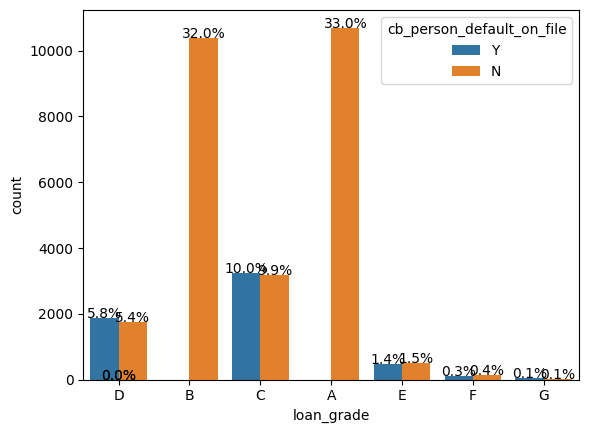

In [ ]:

sns.countplot(x='loan_grade', hue='cb_person_default_on_file', data=df)

total = len(df)
for p in plt.gca().patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax = plt.gca()
        ax.text(x, y, percentage, ha='center')

plt.show()


#### 2) Numerical Columns

In [ ]:
numerical_columns = []
for column in df.columns:
    if df[column].dtype == 'int64'or df[column].dtype == 'float64':
        numerical_columns.append(column)
print("Numerical Columns:", numerical_columns)

Numerical Columns: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length']


##### (i) Histogram plot, Kde plot ,Box plot , Q-Q plot

<ipython-input-24-f4a011b661f1>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['person_age'], shade=True)


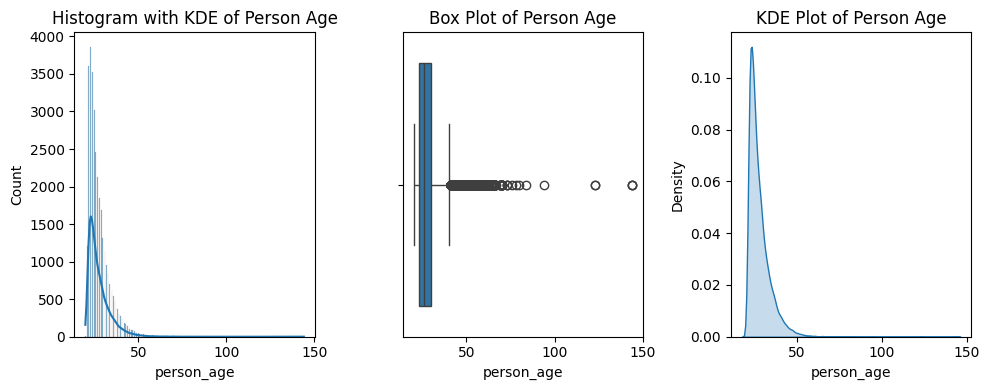

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(10, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['person_age'], kde=True)
plt.title('Histogram with KDE of Person Age')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['person_age'])
plt.title('Box Plot of Person Age')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['person_age'], shade=True)
plt.title('KDE Plot of Person Age')

plt.tight_layout()
plt.show()



<ipython-input-25-6bd305f6686b>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['person_income'], shade=True)


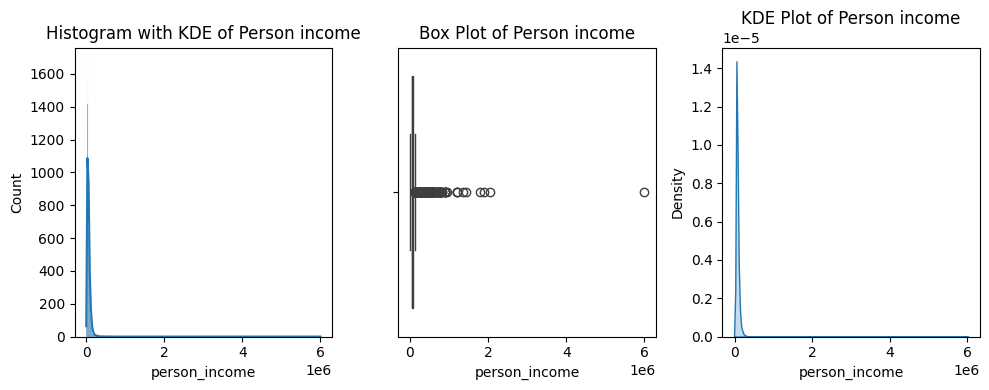

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(10, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['person_income'], kde=True)
plt.title('Histogram with KDE of Person income')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['person_income'])
plt.title('Box Plot of Person income')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['person_income'], shade=True)
plt.title('KDE Plot of Person income')

plt.tight_layout()
plt.show()



<ipython-input-26-6bf1e7e8e288>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['person_emp_length'], shade=True)


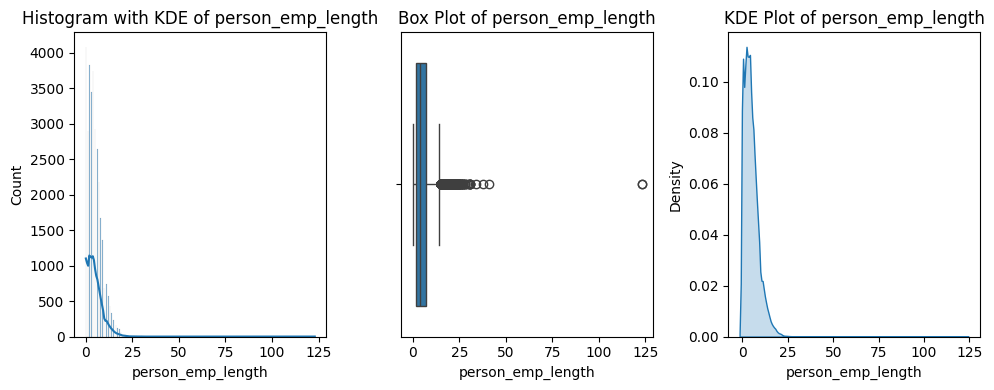

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(10, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['person_emp_length'], kde=True)
plt.title('Histogram with KDE of person_emp_length')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['person_emp_length'])
plt.title('Box Plot of person_emp_length')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['person_emp_length'], shade=True)
plt.title('KDE Plot of person_emp_length')

plt.tight_layout()
plt.show()



<ipython-input-27-a7ee84e290c9>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['loan_amnt'], shade=True)


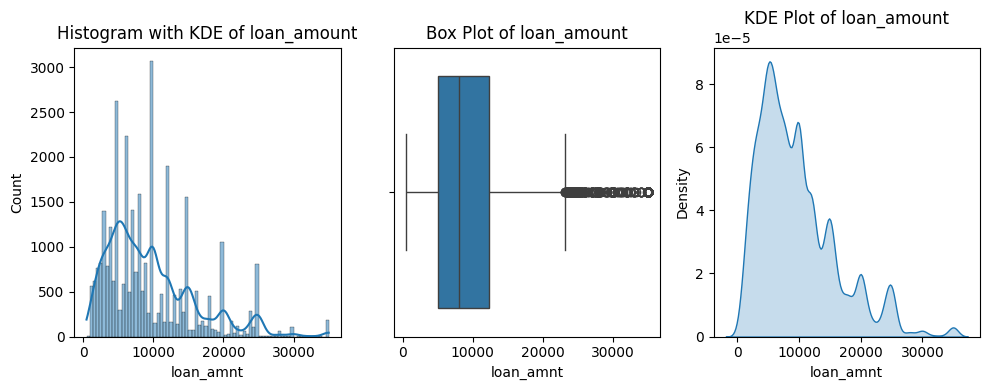

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(10, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['loan_amnt'], kde=True)
plt.title('Histogram with KDE of loan_amount')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['loan_amnt'])
plt.title('Box Plot of loan_amount')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['loan_amnt'], shade=True)
plt.title('KDE Plot of loan_amount')

plt.tight_layout()
plt.show()



<ipython-input-28-5d898f773c9f>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['loan_int_rate'], shade=True)


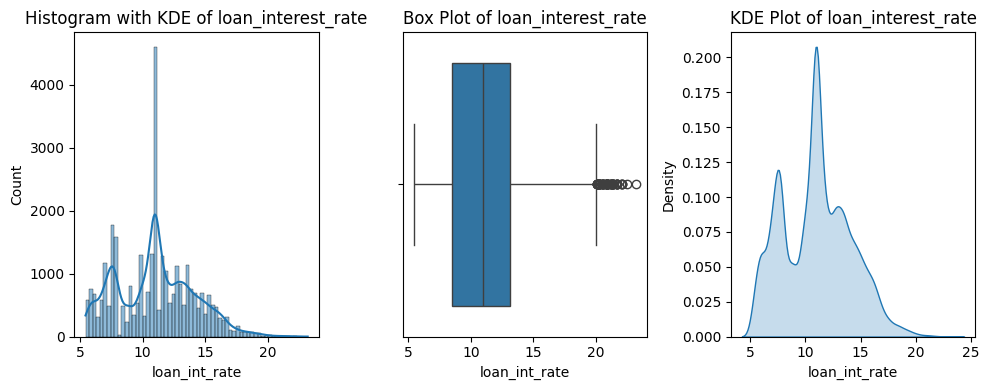

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(10, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['loan_int_rate'], kde=True)
plt.title('Histogram with KDE of loan_interest_rate')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['loan_int_rate'])
plt.title('Box Plot of loan_interest_rate')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['loan_int_rate'], shade=True)
plt.title('KDE Plot of loan_interest_rate')

plt.tight_layout()
plt.show()



<ipython-input-29-b6aba0476cd3>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['loan_percent_income'], shade=True)


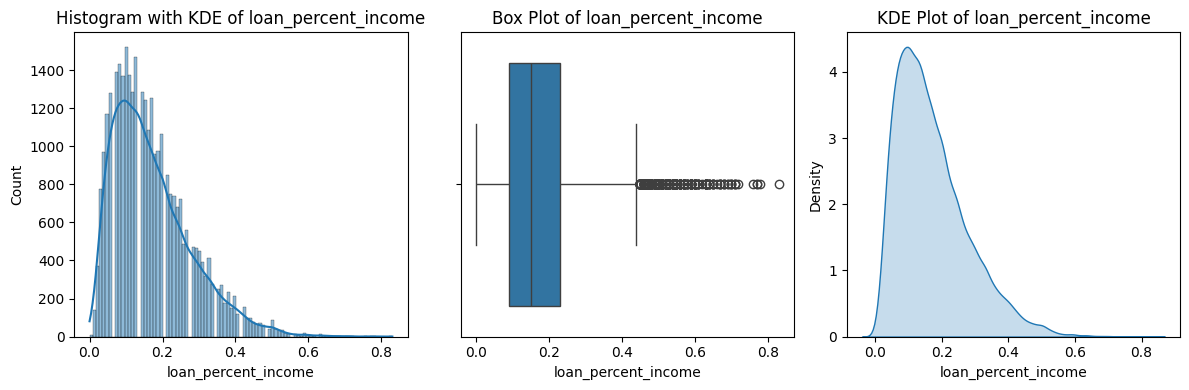

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(12, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['loan_percent_income'], kde=True)
plt.title('Histogram with KDE of loan_percent_income')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['loan_percent_income'])
plt.title('Box Plot of loan_percent_income')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['loan_percent_income'], shade=True)
plt.title('KDE Plot of loan_percent_income')

plt.tight_layout()
plt.show()

<ipython-input-30-0a3424cdf8b6>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['cb_person_cred_hist_length'], shade=True)


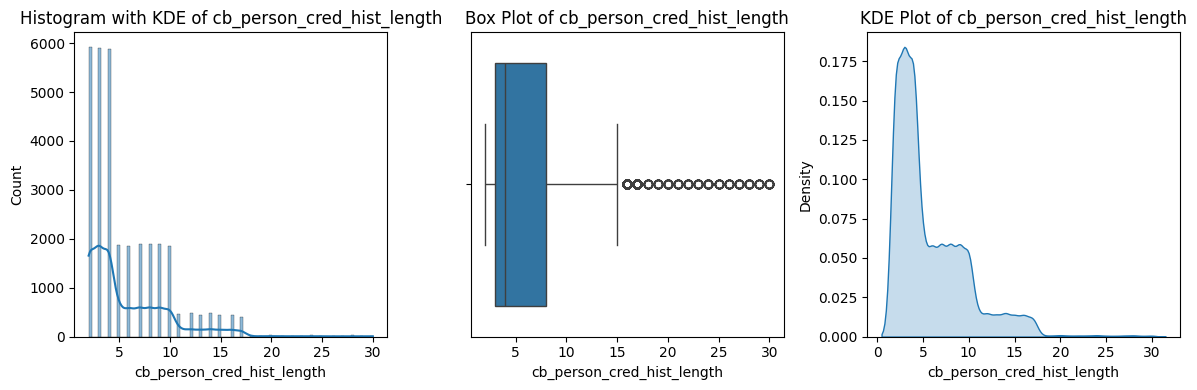

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Plotting histogram, box plot, and KDE for person_age
plt.figure(figsize=(12, 4))

# Histogram with KDE
plt.subplot(1, 3, 1)
sns.histplot(df['cb_person_cred_hist_length'], kde=True)
plt.title('Histogram with KDE of cb_person_cred_hist_length')

# Box Plot
plt.subplot(1, 3, 2)
sns.boxplot(x=df['cb_person_cred_hist_length'])
plt.title('Box Plot of cb_person_cred_hist_length')

# KDE Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df['cb_person_cred_hist_length'], shade=True)
plt.title('KDE Plot of cb_person_cred_hist_length')

plt.tight_layout()
plt.show()

## Bivariate analysis

#### 1.Numeric-Numeric Relationships

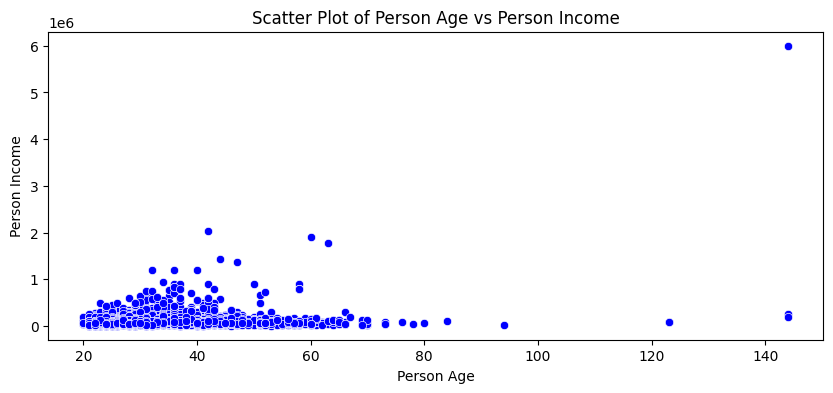

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.scatterplot(x='person_age', y='person_income', data=df, color='b')
plt.title('Scatter Plot of Person Age vs Person Income')
plt.xlabel('Person Age')
plt.ylabel('Person Income')
plt.show()


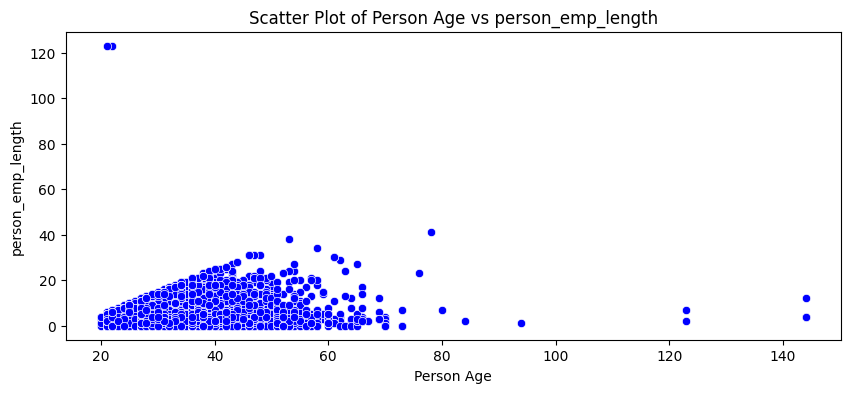

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.scatterplot(x='person_age', y='person_emp_length', data=df, color='b')
plt.title('Scatter Plot of Person Age vs person_emp_length')
plt.xlabel('Person Age')
plt.ylabel('person_emp_length')
plt.show()


In [ ]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

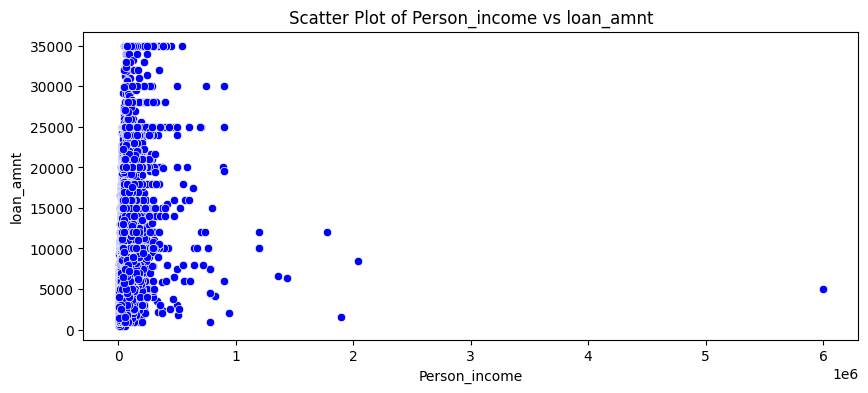

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.scatterplot(x='person_income', y='loan_amnt', data=df, color='b')
plt.title('Scatter Plot of Person_income vs loan_amnt')
plt.xlabel('Person_income')
plt.ylabel("loan_amnt")
plt.show()

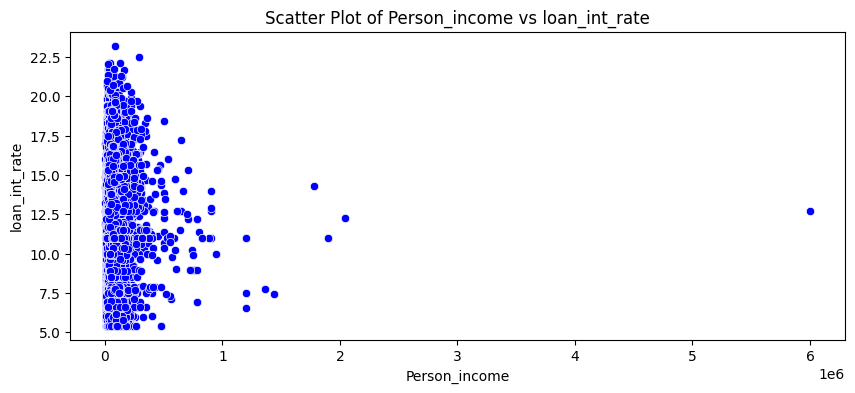

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.scatterplot(x='person_income', y='loan_int_rate', data=df, color='b')
plt.title('Scatter Plot of Person_income vs loan_int_rate')
plt.xlabel('Person_income')
plt.ylabel("loan_int_rate")
plt.show()

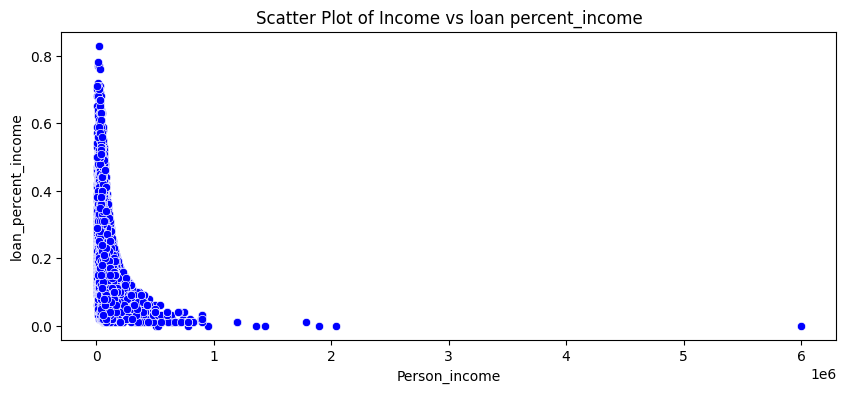

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
sns.scatterplot(x='person_income', y='loan_percent_income', data=df, color='b')
plt.title('Scatter Plot of Income vs loan percent_income')
plt.xlabel('Person_income')
plt.ylabel("loan_percent_income")
plt.show()

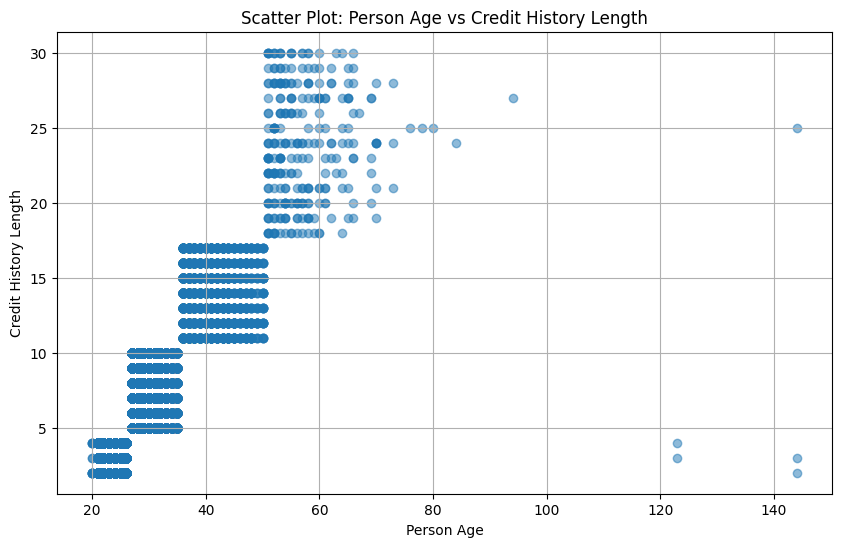

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


x = df['person_age']
y = df['cb_person_cred_hist_length']

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.title('Scatter Plot: Person Age vs Credit History Length')
plt.xlabel('Person Age')
plt.ylabel('Credit History Length')
plt.grid(True)
plt.show()


#### 2. Numeric-Categorical Relationships

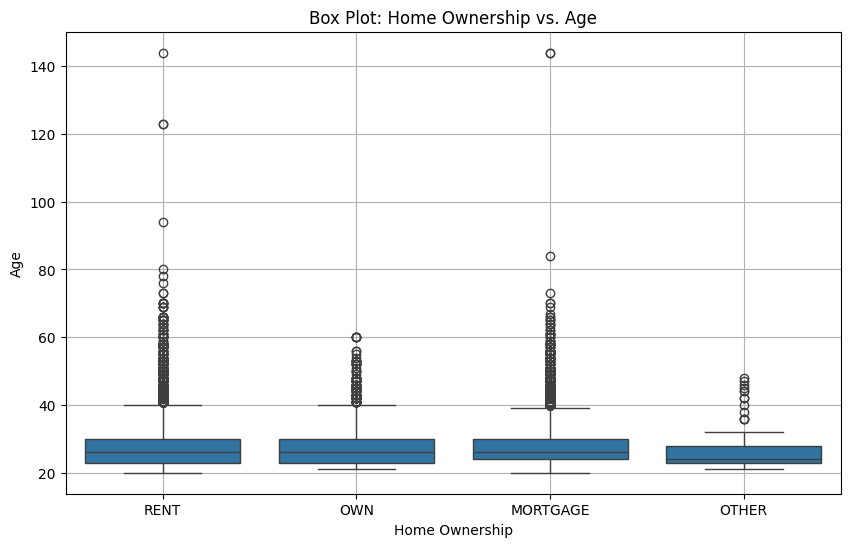

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Box Plot: Home Ownership vs. Age")
sns.boxplot(data=df, x='person_home_ownership', y='person_age')
plt.xlabel("Home Ownership")
plt.ylabel("Age")
plt.grid(True)
plt.show()

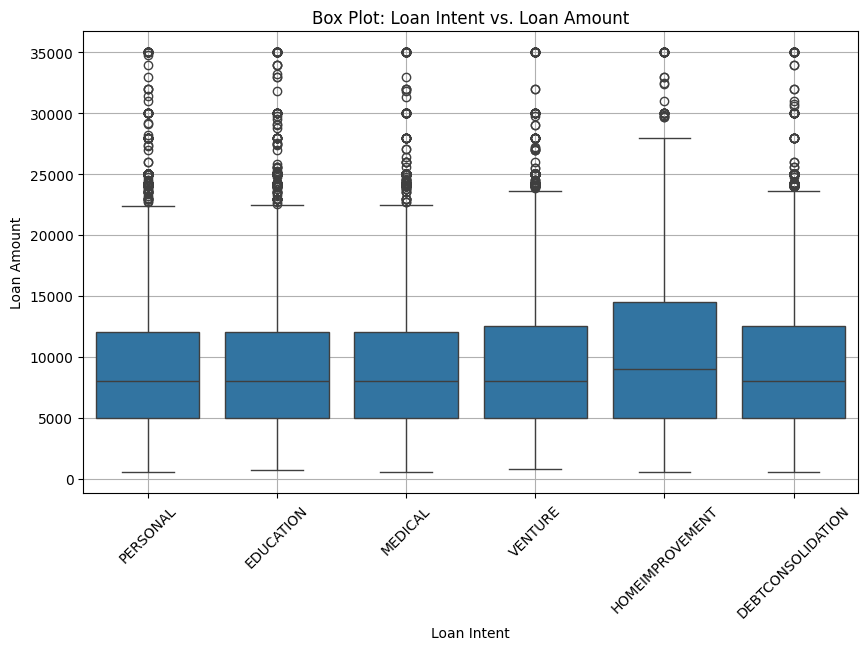

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Box Plot: Loan Intent vs. Loan Amount")
sns.boxplot(data=df, x='loan_intent', y='loan_amnt')
plt.xlabel("Loan Intent")
plt.ylabel("Loan Amount")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



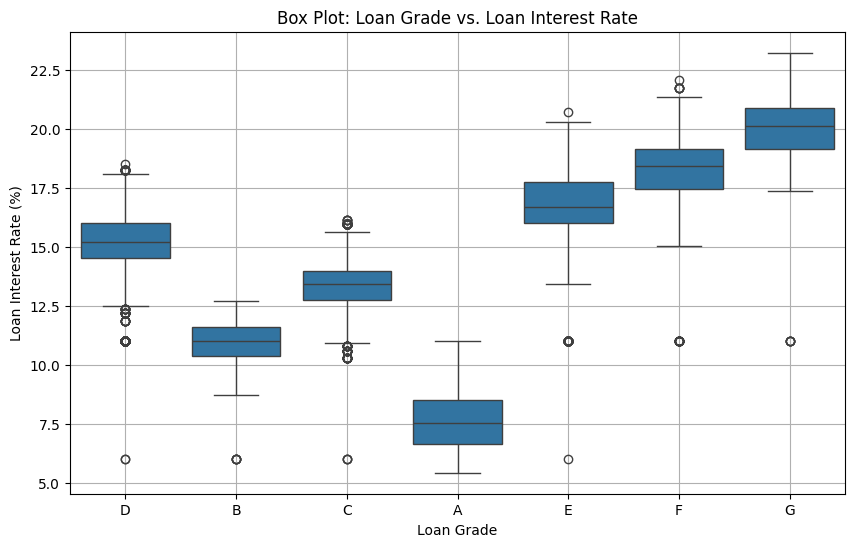

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Box Plot: Loan Grade vs. Loan Interest Rate")
sns.boxplot(data=df, x='loan_grade', y='loan_int_rate')
plt.xlabel("Loan Grade")
plt.ylabel("Loan Interest Rate (%)")
plt.grid(True)
plt.show()


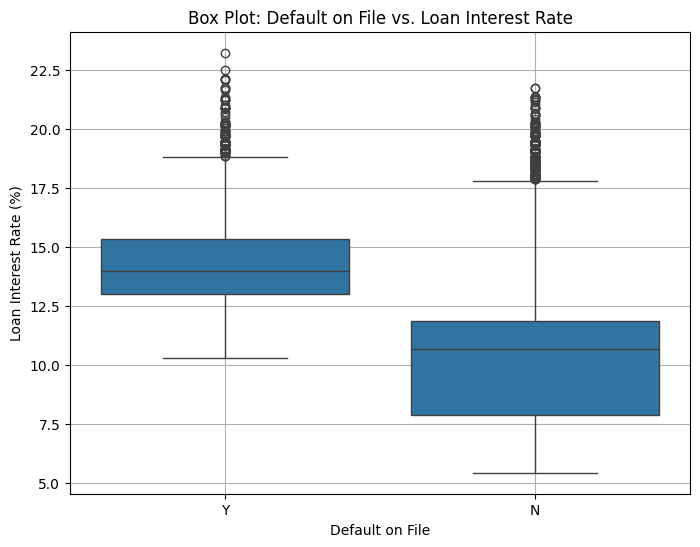

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Box Plot: Default on File vs. Loan Interest Rate")
sns.boxplot(data=df, x='cb_person_default_on_file', y='loan_int_rate')
plt.xlabel("Default on File")
plt.ylabel("Loan Interest Rate (%)")
plt.grid(True)
plt.show()

#### 4.Categorical-Categorical Relationships

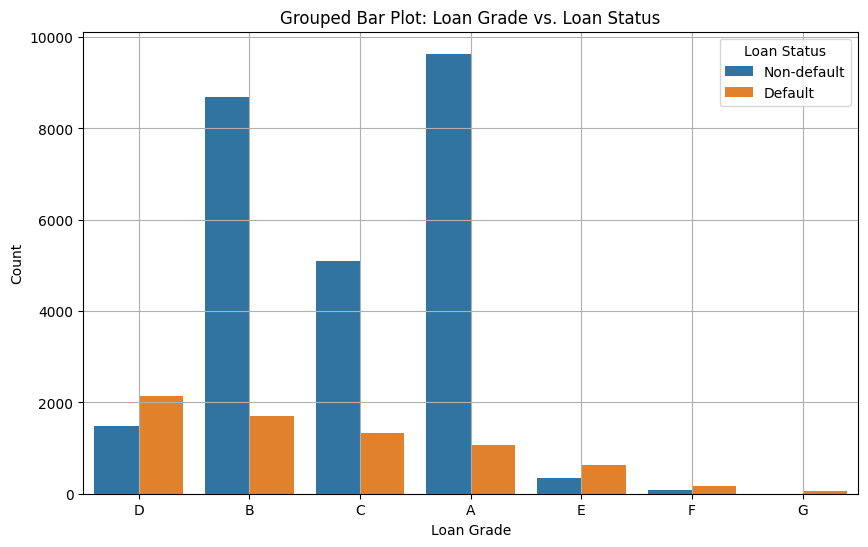

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Grouped Bar Plot: Loan Grade vs. Loan Status")
sns.countplot(data=df, x='loan_grade', hue='loan_status')
plt.xlabel("Loan Grade")
plt.ylabel("Count")
plt.legend(title='Loan Status', labels=['Non-default', 'Default'])
plt.grid(True)
plt.show()

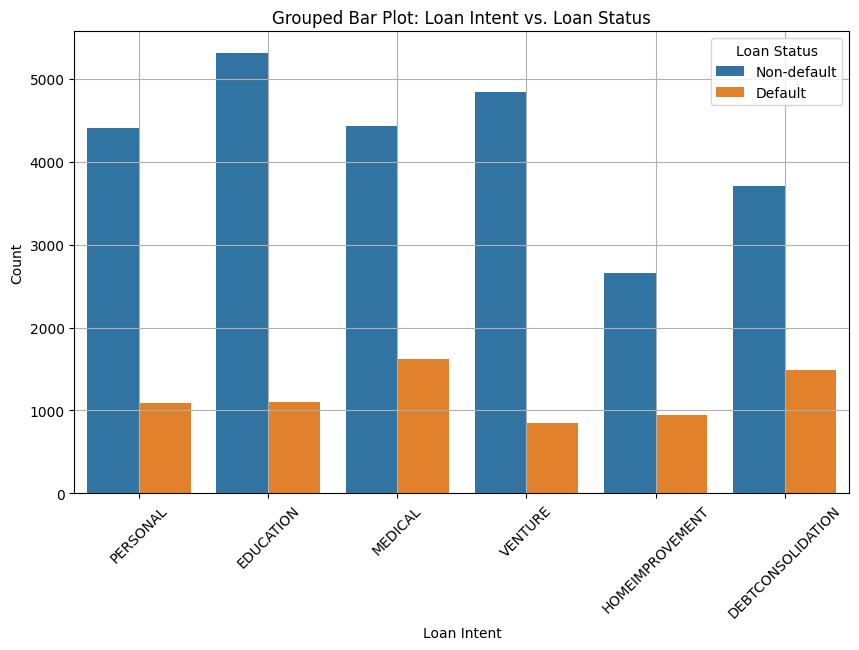

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Grouped Bar Plot: Loan Intent vs. Loan Status")
sns.countplot(data=df, x='loan_intent', hue='loan_status')
plt.xlabel("Loan Intent")
plt.ylabel("Count")
plt.legend(title='Loan Status', labels=['Non-default', 'Default'])
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


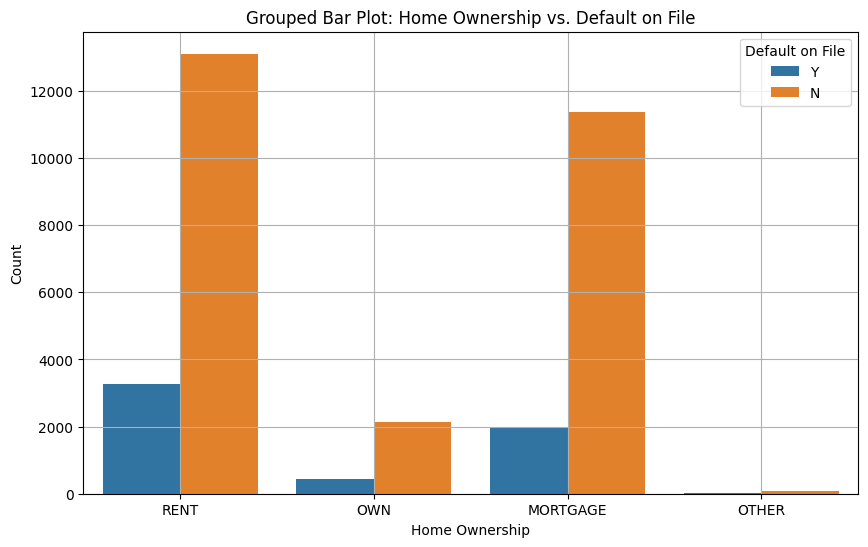

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Grouped Bar Plot: Home Ownership vs. Default on File")
sns.countplot(data=df, x='person_home_ownership', hue='cb_person_default_on_file')
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.legend(title='Default on File', loc='upper right')
plt.grid(True)
plt.show()

In [ ]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


## segregate the inputs and output

In [ ]:
y = df["cb_person_cred_hist_length"]
X = df.drop(columns =["cb_person_cred_hist_length"])

## split the data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(24312, 11) (24312,)
(8104, 11) (8104,)


In [ ]:
X_train.dtypes

person_age                     int64
person_income                  int64
person_home_ownership         object
person_emp_length            float64
loan_intent                   object
loan_grade                    object
loan_amnt                      int64
loan_int_rate                float64
loan_status                    int64
loan_percent_income          float64
cb_person_default_on_file     object
dtype: object

In [ ]:
X_train_cat = X_train.select_dtypes(include = ["object"])
X_train_num = X_train.select_dtypes(include =  ["int64","float64"])

In [ ]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1460,OWN,VENTURE,B,N
6674,RENT,EDUCATION,B,N
25402,MORTGAGE,PERSONAL,B,N
27627,MORTGAGE,VENTURE,C,N
4495,MORTGAGE,EDUCATION,A,N


In [ ]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
1460,22,27000,3.0,10800,10.74,0,0.40
6674,22,55000,7.0,6000,9.25,0,0.11
25402,30,84996,4.0,8000,12.69,0,0.09
27627,32,153000,5.0,8400,12.84,0,0.05
4495,23,41000,7.0,6000,6.03,0,0.15


## Data transformation on train data

### Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_num_transformed = pd.DataFrame(standard.fit_transform(X_train_num),
                                       columns = standard.get_feature_names_out(),
                                       index = X_train_num.index)


In [ ]:
X_train_num_transformed.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,24312.00,24312.00,24312.00,24312.00,24312.00,24312.00,24312.00
mean,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.22,-0.93,-1.16,-1.44,-1.81,-0.53,-1.60
25%,-0.75,-0.42,-0.67,-0.73,-0.82,-0.53,-0.75
50%,-0.27,-0.17,-0.19,-0.25,-0.01,-0.53,-0.19
75%,0.36,0.20,0.54,0.42,0.68,-0.53,0.56
max,18.35,88.64,28.73,4.00,3.96,1.87,5.71


In [ ]:
# analyse the properties of StandardScaler
print("Number of Numerical featues:",standard.n_features_in_)
print("mean of each column:",standard.mean_)
print("std of each column:",np.sqrt(standard.var_))
print("var of each column:",standard.var_)


Number of Numerical featues: 7
mean of each column: [2.77396347e+01 6.64870152e+04 4.77097730e+00 9.61530828e+03
 1.10153673e+01 2.21824613e-01 1.70443402e-01]
std of each column: [6.33548445e+00 6.69400652e+04 4.11554090e+00 6.34029218e+03
 3.08442627e+00 4.15473771e-01 1.06758535e-01]
var of each column: [4.01383633e+01 4.48097233e+09 1.69376769e+01 4.01993050e+07
 9.51368539e+00 1.72618454e-01 1.13973848e-02]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMax = MinMaxScaler()
X_train_num_transformed = pd.DataFrame(MinMax.fit_transform(X_train_num),
                                       columns = MinMax.get_feature_names_out(),
                                       index = X_train_num.index)


In [ ]:
X_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
1460,0.016129,0.003823,0.024390,0.298551,0.298876,0.0,0.512821
6674,0.016129,0.008492,0.056911,0.159420,0.215169,0.0,0.141026
25402,0.080645,0.013495,0.032520,0.217391,0.408427,0.0,0.115385
27627,0.096774,0.024837,0.040650,0.228986,0.416854,0.0,0.064103
4495,0.024194,0.006158,0.056911,0.159420,0.034270,0.0,0.192308


In [ ]:
X_train_num_transformed.describe().round(2)

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,24312.00,24312.00,24312.00,24312.00,24312.00,24312.00,24312.00
mean,0.06,0.01,0.04,0.26,0.31,0.22,0.22
std,0.05,0.01,0.03,0.18,0.17,0.42,0.14
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.02,0.01,0.02,0.13,0.17,0.00,0.12
50%,0.05,0.01,0.03,0.22,0.31,0.00,0.19
75%,0.08,0.01,0.06,0.34,0.43,0.00,0.29
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
# Analyse the properties of MinMaxScaler

print("Number of Numerical Features:",MinMax.n_features_in_)
print("Output Feature Names:",MinMax.get_feature_names_out())
print("Minimum of each column:",MinMax.data_min_)
print("Maximum of each column:",MinMax.data_max_)

Number of Numerical Features: 7
Output Feature Names: ['person_age' 'person_income' 'person_emp_length' 'loan_amnt'
 'loan_int_rate' 'loan_status' 'loan_percent_income']
Minimum of each column: [  20.   4080.      0.    500.      5.42    0.      0.  ]
Maximum of each column: [1.440e+02 6.000e+06 1.230e+02 3.500e+04 2.322e+01 1.000e+00 7.800e-01]


## Data preparation on categorical data

In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder(sparse_output = False,
                              handle_unknown = "ignore")
X_train_cat_transformed = pd.DataFrame(onehotencoder.fit_transform(X_train_cat),
                                       columns = onehotencoder.get_feature_names_out(),
                                       index = X_train_cat.index)
print("shape of data before transformation:",X_train_cat.shape)
print("shape of data after transformation:",X_train_cat_transformed.shape)

X_train_cat_transformed.head()

shape of data before transformation: (24312, 4)
shape of data after transformation: (24312, 19)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1460,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6674,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25402,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27627,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4495,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# Analyse the properties on OHE

print("Applied encoding on:",onehotencoder.feature_names_in_)
print("Unique categories:",onehotencoder.categories_)
print("Feature names after encoding:",onehotencoder.get_feature_names_out())

Applied encoding on: ['person_home_ownership' 'loan_intent' 'loan_grade'
 'cb_person_default_on_file']
Unique categories: [array(['MORTGAGE', 'OTHER', 'OWN', 'RENT'], dtype=object), array(['DEBTCONSOLIDATION', 'EDUCATION', 'HOMEIMPROVEMENT', 'MEDICAL',
       'PERSONAL', 'VENTURE'], dtype=object), array(['A', 'B', 'C', 'D', 'E', 'F', 'G'], dtype=object), array(['N', 'Y'], dtype=object)]
Feature names after encoding: ['person_home_ownership_MORTGAGE' 'person_home_ownership_OTHER'
 'person_home_ownership_OWN' 'person_home_ownership_RENT'
 'loan_intent_DEBTCONSOLIDATION' 'loan_intent_EDUCATION'
 'loan_intent_HOMEIMPROVEMENT' 'loan_intent_MEDICAL'
 'loan_intent_PERSONAL' 'loan_intent_VENTURE' 'loan_grade_A'
 'loan_grade_B' 'loan_grade_C' 'loan_grade_D' 'loan_grade_E'
 'loan_grade_F' 'loan_grade_G' 'cb_person_default_on_file_N'
 'cb_person_default_on_file_Y']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder= OneHotEncoder(drop = 'first',
                             sparse_output = False,
                             handle_unknown = "ignore")
X_train_cat_transformed = pd.DataFrame(onehotencoder.fit_transform(X_train_cat),
                                       columns = onehotencoder.get_feature_names_out(),
                                       index = X_train_cat.index)
print("shape of data before transformation:",X_train_cat.shape)
print("shape of data after transformation:",X_train_cat_transformed.shape)

X_train_cat_transformed.head()

shape of data before transformation: (24312, 4)
shape of data after transformation: (24312, 15)


,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1460,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6674,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
25402,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
27627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4495,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
person_home_ownership_categories = ["Rent","Other","Own"]
loan_intent_categories = ["Education","Homeimprovement","Medical","Personal","Venture"]
loan_grade_categories = ["B","C","D","E","F","G"]
cb_person_default_on_file_categories =["Y"]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder(categories = [person_home_ownership_categories,loan_intent_categories,loan_grade_categories,cb_person_default_on_file_categories],
                                handle_unknown = "use_encoded_value",
                                unknown_value = -1,
                                encoded_missing_value=-5)
X_train_cat_transformed = pd.DataFrame(ordinalencoder.fit_transform(X_train_cat),
                                      columns = ordinalencoder.get_feature_names_out(),
                                      index = X_train_cat.index)
X_train_cat_transformed.head()




,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1460,-1.0,-1.0,0.0,-1.0
6674,-1.0,-1.0,0.0,-1.0
25402,-1.0,-1.0,0.0,-1.0
27627,-1.0,-1.0,1.0,-1.0
4495,-1.0,-1.0,-1.0,-1.0


In [ ]:
print("Applied encoding on:",ordinalencoder.feature_names_in_)
print("Unique categories:",ordinalencoder.categories_)
print("Feature names after encoding:",ordinalencoder.get_feature_names_out())

Applied encoding on: ['person_home_ownership' 'loan_intent' 'loan_grade'
 'cb_person_default_on_file']
Unique categories: [array(['Rent', 'Other', 'Own'], dtype=object), array(['Education', 'Homeimprovement', 'Medical', 'Personal', 'Venture'],
      dtype=object), array(['B', 'C', 'D', 'E', 'F', 'G'], dtype=object), array(['Y'], dtype=object)]
Feature names after encoding: ['person_home_ownership' 'loan_intent' 'loan_grade'
 'cb_person_default_on_file']


In [ ]:
X_train_transformed = pd.concat([X_train_num_transformed,X_train_cat_transformed],axis = 1)
X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
1460,0.016129,0.003823,0.024390,0.298551,0.298876,0.0,0.512821,-1.0,-1.0,0.0,-1.0
6674,0.016129,0.008492,0.056911,0.159420,0.215169,0.0,0.141026,-1.0,-1.0,0.0,-1.0
25402,0.080645,0.013495,0.032520,0.217391,0.408427,0.0,0.115385,-1.0,-1.0,0.0,-1.0
27627,0.096774,0.024837,0.040650,0.228986,0.416854,0.0,0.064103,-1.0,-1.0,1.0,-1.0
4495,0.024194,0.006158,0.056911,0.159420,0.034270,0.0,0.192308,-1.0,-1.0,-1.0,-1.0


## Apply Data preparation on test data

In [ ]:
X_test_cat = X_test.select_dtypes(include = ['object'])
X_test_num = X_test.select_dtypes(include = ["int64","float64"])

In [ ]:
X_test_num_transformed = pd.DataFrame(MinMax.transform(X_test_num),
                                     columns = MinMax.get_feature_names_out(),
                                     index = X_test_num.index)
X_test_num_transformed.head()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
21641,0.088710,0.007659,0.065041,0.159420,0.453371,0.0,0.153846
74,0.048387,0.013496,0.016260,0.797101,0.116292,1.0,0.423077
416,0.048387,0.009661,0.073171,0.681159,0.139326,1.0,0.500000
9369,0.024194,0.009567,0.048780,0.057971,0.312921,0.0,0.051282
6814,0.032258,0.010160,0.024390,0.159420,0.312921,0.0,0.115385


In [ ]:
X_test_cat_transformed = pd.DataFrame(ordinalencoder.transform(X_test_cat),
                                     columns = ordinalencoder.get_feature_names_out(),
                                     index = X_test_cat.index)
X_test_cat_transformed.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
21641,-1.0,-1.0,1.0,0.0
74,-1.0,-1.0,-1.0,-1.0
416,-1.0,-1.0,-1.0,-1.0
9369,-1.0,-1.0,0.0,-1.0
6814,-1.0,-1.0,-1.0,-1.0


In [ ]:
X_test_transformed = pd.concat([X_test_num_transformed,X_test_cat_transformed],axis=1)
X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
21641,0.088710,0.007659,0.065041,0.159420,0.453371,0.0,0.153846,-1.0,-1.0,1.0,0.0
74,0.048387,0.013496,0.016260,0.797101,0.116292,1.0,0.423077,-1.0,-1.0,-1.0,-1.0
416,0.048387,0.009661,0.073171,0.681159,0.139326,1.0,0.500000,-1.0,-1.0,-1.0,-1.0
9369,0.024194,0.009567,0.048780,0.057971,0.312921,0.0,0.051282,-1.0,-1.0,0.0,-1.0
6814,0.032258,0.010160,0.024390,0.159420,0.312921,0.0,0.115385,-1.0,-1.0,-1.0,-1.0


## Training and Testing phase

In [ ]:
%%time
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regression = LinearRegression()
regression.fit(X_train_transformed,y_train)

y_test_pred = regression.predict(X_test_transformed)

print("Model's error:",metrics.mean_absolute_error(y_test,y_test_pred))
print()


Model's error: 1.5069564514575402

CPU times: user 51.8 ms, sys: 30.8 ms, total: 82.6 ms
Wall time: 167 ms


In [ ]:
output_df=pd.DataFrame({'Actual':y_test})

In [ ]:
output_df['Linear Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions
21641,9,7.671075
74,3,4.871844
416,3,4.867816
9369,3,3.200570
6814,2,3.758989
...,...,...
15824,4,4.749434
15407,2,4.362969
16106,3,2.176328
3691,4,2.063600


In [ ]:
%%time
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics

regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's error:",metrics.mean_absolute_error(y_test,y_test_pred))
print()

Model's error: 1.6743830207305035

CPU times: user 690 ms, sys: 48.9 ms, total: 739 ms
Wall time: 756 ms


In [ ]:
output_df['KNN Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions
21641,9,7.671075,6.4
74,3,4.871844,4.4
416,3,4.867816,5.6
9369,3,3.200570,2.6
6814,2,3.758989,2.0
...,...,...,...
15824,4,4.749434,4.8
15407,2,4.362969,4.4
16106,3,2.176328,2.8
3691,4,2.063600,3.2


In [ ]:
%%time
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's error:",metrics.mean_absolute_error(y_test,y_test_pred))
print()

Model's error: 1.4378084896347483

CPU times: user 217 ms, sys: 7.74 ms, total: 224 ms
Wall time: 250 ms


In [ ]:
output_df['DT Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions
21641,9,7.671075,6.4,8.0
74,3,4.871844,4.4,3.0
416,3,4.867816,5.6,4.0
9369,3,3.200570,2.6,4.0
6814,2,3.758989,2.0,2.0
...,...,...,...,...
15824,4,4.749434,4.8,2.0
15407,2,4.362969,4.4,4.0
16106,3,2.176328,2.8,2.0
3691,4,2.063600,3.2,4.0


In [ ]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

regressor = RandomForestRegressor()
regressor.fit(X_train_transformed,y_train)

y_test_pred = regressor.predict(X_test_transformed)

print("Model's error:",metrics.mean_absolute_error(y_test,y_test_pred))
print()

Model's error: 1.1434206089683323

CPU times: user 15 s, sys: 146 ms, total: 15.2 s
Wall time: 17.6 s


In [ ]:
output_df['RF Regression Predictions'] = y_test_pred

output_df

,Actual,Linear Regression Predictions,KNN Regression Predictions,DT Regression Predictions,RF Regression Predictions
21641,9,7.671075,6.4,8.0,7.056667
74,3,4.871844,4.4,3.0,3.030000
416,3,4.867816,5.6,4.0,2.948333
9369,3,3.200570,2.6,4.0,3.125833
6814,2,3.758989,2.0,2.0,2.473333
...,...,...,...,...,...
15824,4,4.749434,4.8,2.0,2.774286
15407,2,4.362969,4.4,4.0,3.472500
16106,3,2.176328,2.8,2.0,2.350000
3691,4,2.063600,3.2,4.0,2.990000


## Evaluation Metrics

In [ ]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  1.1434206089683323
Mean Squared Error:  2.1260962806189854
Root Mean Squared Error:  1.4581139463769577


In [ ]:
print(metrics.r2_score(y_test, y_test_pred))

0.8733058816025249


In [ ]:
# prompt: inisghts above Regression Predictions

- Linear Regression has the lowest mean absolute error (MAE) of 1.0612, indicating that its predictions are on average 1.0612 units away from the actual values.
- KNN Regression has a slightly higher MAE of 1.1072, suggesting that its predictions are slightly less accurate than Linear Regression.
- Decision Tree Regression has a higher MAE of 1.1598, indicating that its predictions are more variable and further away from the actual values compared to the previous two models.
- Random Forest Regression performs the best among the four models with the lowest MAE of 0.9993, demonstrating that its predictions are closest to the actual values.

- Looking at the Root Mean Squared Error (RMSE), Random Forest Regression also has the lowest value of 1.3155, further confirming its superior performance in terms of accuracy.

- The R-squared score for Random Forest Regression is 0.9407, which is the highest among all models. This indicates that Random Forest Regression explains 94.07% of the variance in the target variable (cb_person_cred_hist_length).

- Overall, based on the evaluation metrics, Random Forest Regression appears to be the most suitable model for predicting the target variable with the highest accuracy and lowest error rates.

SyntaxError: invalid syntax (<ipython-input-81-496f1fe33b4c>, line 3)